In [36]:
#In questo piccolo script mi dedicherò ai vari metodi di organizzare le informazio
#Mi baserò su un DF dove sono contenute varie informazioni sui prezzi delle auto usate e le loro caratteristiche

#Importo le librerie pandas e matplot.lib

import pandas as pd
import matplotlib.pylab as plt

#Importo la url dove si trova il file .csv

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

#Mi creo una lista con i nomi delle colonne perchè già che il file non le ha

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

#Uso il metodo pandas .read_csv per salvare il file csv dentro un dataframa

df = pd.read_csv(filename, names = headers)

#Do un occhiata alle prime righe del dataframe per vedere che sia tutto ok

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [37]:
#Vedo che alcune volte mi mancano dei valori, dove c'è '?', mi faccio una maschera booleana e conto i valori che mi mancano per ogni colonna

#Creo maschera booleana con il  metodo .isnull()

missing_data = df.isnull()

#Mi creo un ciclo for per contare in ogni colonna quanti valori mancano

for column in missing_data.columns.values.tolist():  #Ciclo for per ogni colonna del df prende il valore indicato e lo conta
    print(column)    #Mi stampa il nome della colonna
    print(missing_data[column].value_counts())  #Mi stampa il valore che sto contando e me lo conta
    print('')   #Mi lascia uno spazio tra un ciclo for e l'altro



symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    205
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    205
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
False    205
Name: fuel-syst

In [38]:
#Per prima cosa cambio i valori '?' con 'NaN' cosi poi posso rimpiazzarli

df.replace("?", 'nan', inplace = True)

#Calcolo la media della colonna 'normalized-losses' e dove ho i valori NaN li sostituisco con il valore

avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)

df['normalized-losses'].replace('nan', avg_norm_loss, inplace=True)

#Calcolo la media della colonna 'bore' e la sostituisco ai valori nan

avg_bore = df['bore'].astype('float').mean(axis=0)

df['bore'].replace('nan', avg_bore, inplace=True)

#Stessa cosa per la colonna 'stroke'

avg_stroke = df['stroke'].astype('float').mean(axis=0)

df['stroke'].replace('nan', avg_stroke, inplace=True)

#Stessa cosa per Horse Power

avg_horse_power = df['horsepower'].astype('float').mean(axis=0)

df['horsepower'].replace('nan', avg_horse_power, inplace=True)

#Stessa cosa per Peak RPM

avg_peak_rpm = df['peak-rpm'].astype('float').mean(axis=0)

df['peak-rpm'].replace('nan', avg_peak_rpm, inplace=True)

#Diamo un occhio a come rimane il df

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [39]:
#Vedo che mi mancano anche dei dati nella colonna doors però è un str, di seguito calcolo quanti modelli hanno 2 o 4 porte

df['num-of-doors'].value_counts()

four    114
two      89
nan       2
Name: num-of-doors, dtype: int64

In [40]:
#Quindi sostituisco ai due modelli che non hanno valori 'four' che è il dato piú presente

df['num-of-doors'].replace('nan', 'four', inplace=True)

#Elimino anche le righe che hanno NaN nella colonna price perchè non possono aiutarmi a calcolare la media del prezzo
#Metodo .dropna()

df.dropna(subset=['price'], axis=0, inplace=True)

#Faccio un reset dell'indice perchè ho eliminato delle righe
#Metodo .reset_index

df.reset_index(drop=True, inplace=True)

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [41]:
#Vediamo che formato hanno i dati

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [42]:
#Siccome vedo che alcuni dati hanno una caratteristica obj ma dovrebbero essere float o viceversa li converto

df[['bore', 'stroke', 'price', 'peak-rpm', 'horsepower']] = df[['bore', 'stroke', 'price', 'peak-rpm', 'horsepower']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('int')

df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [43]:
#Ora abbiamo un df pulito e con i valori con i type corretti
#Prossimo passo è normalizzare i dati, lo facciamo con 'lenght' 'width' e 'height'
#La normalizzazione dei dati avviene dividendo ogni valore per il valore massimo della colonna

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


Text(0.5, 1.0, 'horsepower bins')

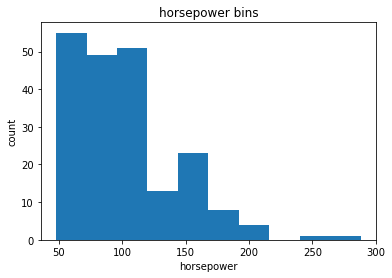

In [44]:
#Discretizzo i dati, cioè trasformo i dati numerici in contenitori per il loro studio grafico, utiliziamo 'horsepower'

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# Scrivo le etichette nel grafico per capire meglio
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [45]:
#Vedo che è complicato prendere i dati singolarmente, mi creo quindi 3 categorie di potenza, Low, Medium, High
#Importo le funzioni NumPy

import numpy as np

#Per prima cosa mi trovo i valori delle 3 parti in un array
#Con .linspace mi faccion un array dove il min è il valore minimo presente, max è il valore massimo presente, peró ho bisogno di 4 valori per definire i 3 range

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

#Stabilisco i nomi dei gruppi

group_names = ['Low', 'Medium', 'High']

#Uso il metodo .cut() per stabilire in che range va ogni valore

df['horsepower_binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)

#Vedo quanti valori ci sono in ogni contenitore

df['horsepower_binned'].value_counts()

Low       163
Medium     40
High        2
Name: horsepower_binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

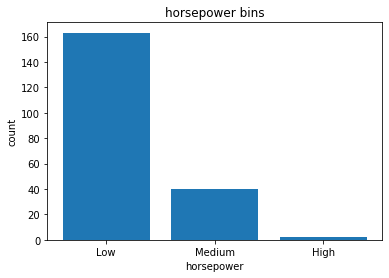

In [46]:
#Creo un grafico con i 3 valori binned

pyplot.bar(group_names, df['horsepower_binned'].value_counts())

#Metto le etichette agli assi

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [47]:
#-------------------------------------------#

#Uso della variabile dummy, la uso per etichettare numericamente le variabili presenti in una categoria

#In questo caso posso usare la varibile dummy per categorizzare 'aspiration'

dummy_variable_1 = pd.get_dummies(df['aspiration'])

#Inserisco il nuovo dataframe con la varibile dummy nel dataframe originale

ddf = pd.concat([df, dummy_variable_1], axis=1)

#Elimino la colonna 'aspiration' dato che ho giá STD e TURBO 
df.drop("aspiration", axis = 1, inplace=True)

#Per completare la pulizia del DF posso usare la variabile dummy anche per 'fuel-type'

dummy_variable_2 = pd.get_dummies(df['fuel-type'])
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('fuel-type', axis = 1, inplace=True)

#Vedere com'è adesso la tabella
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_binned,diesel,gas
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,2.68,9.0,111.0,5000.0,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,2.68,9.0,111.0,5000.0,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,3.47,9.0,154.0,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,3.40,10.0,102.0,5500.0,24,30,13950.0,Low,0,1
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,3.40,8.0,115.0,5500.0,18,22,17450.0,Low,0,1


In [48]:
#POTREI SALVARE I NUOVI DATI IN UN NUOVO CSV

#df.to_csv('clean_df.csv')